<a href="https://colab.research.google.com/github/maikyramon/bootcamp/blob/main/BootCampDataScienceM%C3%B3dulo1Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALIZANDO DADOS DA SAÚDE COM PYTHON E PANDAS**

---



**Aula 1: Preparando o ambiente.**

- Buscar dados do TabNet (DATASUS)
    - Acesso ao site do TabNet para buscar os dados do DATASUS. Foram feitas algumas pesquisas e foi baixado o arquivo .csv com os dados 
  Valor de procedimento, separado por unidade de federação.
- upload arquivo de dados pro colab
    - É possível fazer o updload de arquivos para o google colab, porém os arquivos ficam disponíveis enquanto é usado, ao resetar o colab são perdidos.
- ler o arquivo
    - Leitura do arquivo utilizando o read_csv do pandas
    - Erro de UTF8 (encoding): É necessário setar o encoding ao ler o arquivo por conta dos caracteres especiais da língua portuguesa.
    - skiprows e skipfooter: No arquivo baixado há algumas colunas de informações que não serão relevantes por enquanto. Usamos estes comandos para pular estas colunas e não serem carregadas no DataFrame.
    - Separador: informamos qual o separador é utilizado para delimitar os campos
- .head: Comando para exibir as primeiras 5 linhas 
- .tail: Comando para exibir as últimas 5 linhas
- .info: Mostra informações sobre o DataFrame, como espaço utilizado, tipos dos campos, etc.
- pd.options.display: Utilizado para definir configurações do panda, neste exemplo utilizamos para definir os padrões de formatação de números;

**Aula 2: Visualizações**
- Criada visualização plot
  - Configurações do plot: Como configurar os eixos x e y, tamanho do gráfico e tipo (kind)
  - matplotlib: importada nova lib para poder mexer nos eixos, separando o objeto dos eixos em um específico, podemos alterar diretamente.
  - Título: Utilizando o matplotlib podemos alterar o título do gráfico
  - Tickers (valores dos eixos x e y): 
  - importação da biblioteca para formatação dos tickers


  **Entendendo Gráficos** 
  - Slice dos dados pegando pelo index
  - Não permite inserir colunas no index por ser uma série imutavel, para poder inserir deve-se transformar em uma lista com o comando .tolist()
  - Setar uma outra coluna como indice com set_index()
  - Alternar entre as colunas e linhas com .T (transpor) assim as linhas viram colulas e as colunas linhas.
  - plotado o gráfico, porém com uma coluna enorme ao final, que é o Total. Estava "acabando" com o gráfico.
  - Dropada coluna total para corrigir o gráfico.


  **Desafio1: Colocar as legendas fora do plot para melhor visualização**

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Desafio 2: Plotar com apenas 5 estados**
estados = usaveis.T[["11 Rondônia", "12 Acre", "13 Amazonas", "14 Roraima", "15 Pará"]]
estados.plot(figsize=(12,6), grid=True)




**Manipulação de dados**
- usar as Columns e fazer slices para buscar 5 estados
- Transpor e buscar as colunas é o mesmo que pegar o índice!
  
  



In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from itertools import cycle, islice

In [73]:
pd.options.display.float_format = "{:.2f}".format

In [74]:
#dados = pd.read_csv('/content/A193403189_28_143_208.csv', engine='python', encoding="ISO-8859-1", skiprows=3, sep=';', skipfooter=12, thousands='.', decimal=',')
dados = pd.read_csv('/content/A160324189_28_143_208.csv', engine='python', encoding="ISO-8859-1", skiprows=3, sep=';', skipfooter=12, thousands='.', decimal=',')

Text(0.5, 1.0, 'Valor por unidade de federação')

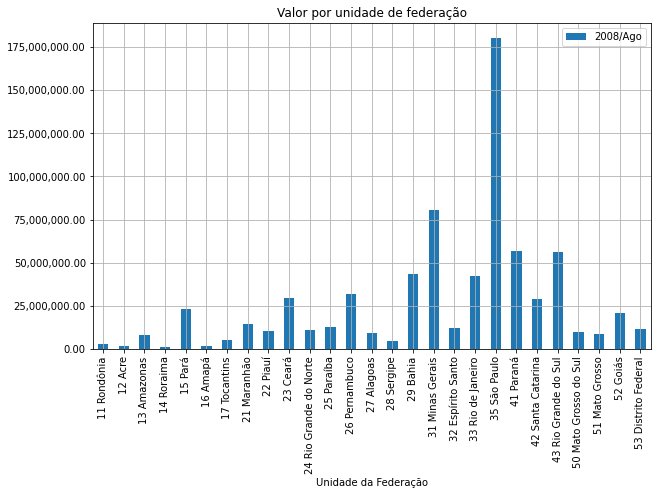

In [75]:
ax = dados.plot(y="2008/Ago", x="Unidade da Federação", kind="bar", figsize=(10,6), grid=True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade de federação")

In [76]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
#colunas_usaveis

In [77]:
usaveis = dados[colunas_usaveis]
#usaveis.head()

In [78]:
usaveis = usaveis.set_index("Unidade da Federação")

In [79]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [80]:
usaveis = usaveis.drop("Total", axis=1) 

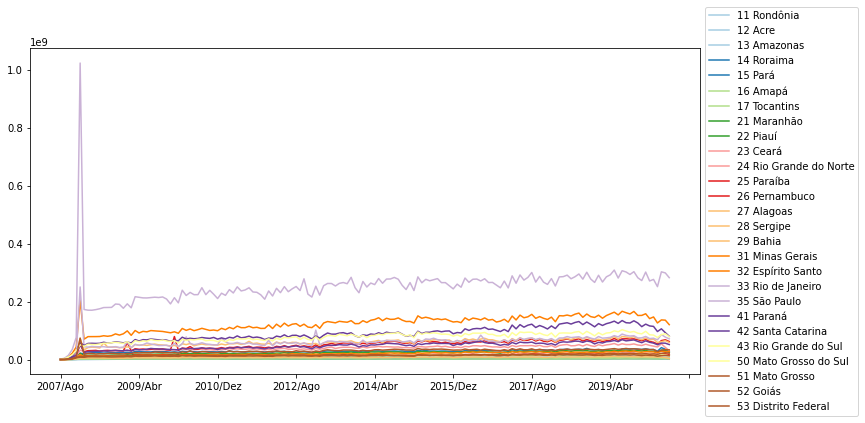

In [81]:
usaveis.T.plot(figsize=(12,6), colormap='Paired')
#df = pandas.DataFrame(x)
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None))

#DESAFIO
#Melhorar a visualização
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

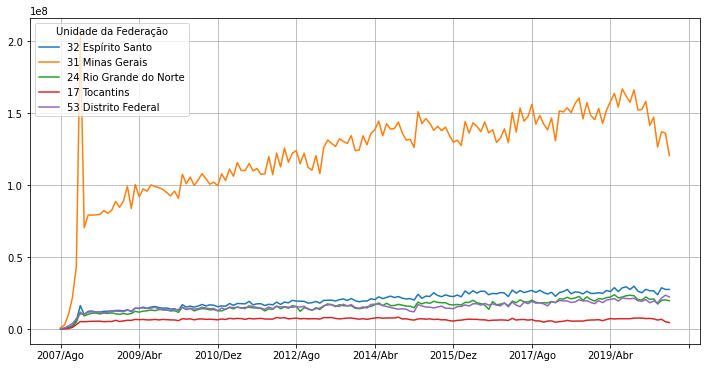

In [82]:
#estados = usaveis.T[["11 Rondônia", "12 Acre", "13 Amazonas", "14 Roraima", "15 Pará"]]
#ou
#estados = usaveis[:5].T         # 5 primeiros
#estados = usaveis.sample(n=5).T # 5 aleatorios
import numpy as np       
np.random.seed(687942)  # a seed é o numero inicial que gera os randomicos, 
                        # setando uma seed é possível reproduzir a mesma sequencia utilizando o sample!

estados = usaveis.sample(n=5).T 
estados.plot(figsize=(12,6), grid=True)

In [83]:
estados_mais_gastaram = usaveis.sample(n=5) #usaveis.columns[:5]
estados_mais_gastaram

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,29998635.78,30454606.34,32082203.52,29845655.79,34921069.20,33677499.55,34053483.16,35685005.53,38337704.14,37110055.24,36516827.06,36207968.50,35451417.03,34360136.47,34093173.06,33608566.26,38776130.28,36705001.71,38085803.13,37686277.05,38574085.03,40256188.61,37840220.77,38963855.34,38297339.52,...,54104976.28,60195929.05,58296066.50,58362424.47,60181080.42,55168339.49,56655278.59,56069454.96,52426527.16,55200330.53,50094672.65,58796191.84,61160709.55,60093810.34,61237932.18,63709506.55,63061083.41,59354217.40,63961626.64,61553236.70,53908557.78,59452473.88,57176215.74,61547622.60,62756764.33,65813210.22,61817516.05,68759673.19,64503540.72,66075691.36,67767419.13,62635827.71,58210191.51,64546099.76,59549208.75,56709962.09,51179993.45,56843604.33,56503747.99,51764534.76
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,...,64524506.56,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,19

In [84]:
usaveis["Total"] = usaveis.sum(axis=1)  # CRIA A COLUNA TOTAL COM OS DADOS DA SOMA DE TODAS AS OUTRAS COLUNAS
usaveis.head()                          # VISUALIZA AS 5 PRIMEIRAS LINHAS 

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,925572673.82
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420666755.81
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1766925554.09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [132]:
# DESAFIO:
# Criar uma coluna com o nome da região

usaveis["Região"] = usaveis.index.str[0]                                     # CRIA O NOVO CAMPO REGIÃO E SALVA O PRIMEIRO CARACTER DE CADA COLUNA, NESTE CASO REPRESENTA A REGIÃO
regioes = {1:'Norte', 2:'Nordeste', 3:'Sudeste', 4:'Sul', 5:'Centro-Oeste'}  # CRIA UM ENUMERADOR PARA CADA REGIÃO E SEU RESPECTIVO NOME
usaveis['Região'] = usaveis['Região'].map(lambda i: regioes[int(i)])         # SALVA NA REGIÃO O NOME MAPIANDO O ENUMERADOR CRIADO ACIMA
usaveis.head()                                                               # VISUALIZA AS 5 PRIMEIRAS LINHAS

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,925572673.82,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420666755.81,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1766925554.09,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2699213.85,2682746.28,2891100.20,2737677.7

In [108]:
ordenado_total = usaveis.sort_values("Total", ascending=False) # ORDENA PELO CAMPO TOTAL DE MANEIRA DECRESCENTE
ordenado_total = ordenado_total.drop("Total", axis=1)          # DROPA A COLUNA TOTAL PRA NÃO CAGAR O GRÁFICO DEPOIS
ordenado_total.head()                                          # VISUALIZA AS 5 PRIMEIRAS LINHAS

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.

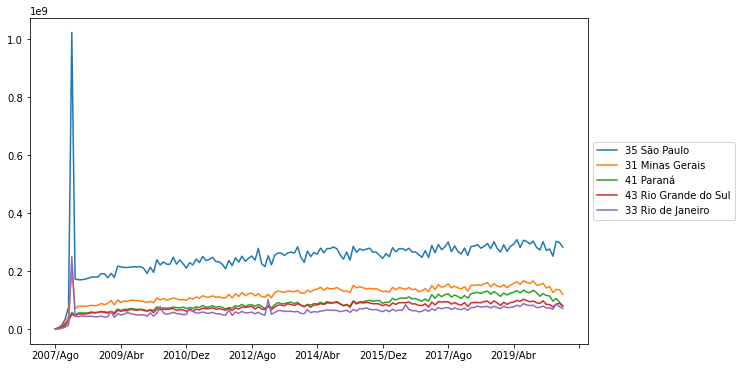

In [104]:
ordenado_total.head(5).T.plot(figsize=(10,6))            # PLOTA SOMENTE AS 5 PRIMEIROS REGISTROS

#DESAFIO
#Melhorar a visualização
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) # JOGA A CAIXA DE LEGENDA PARA FORA DO PLOT

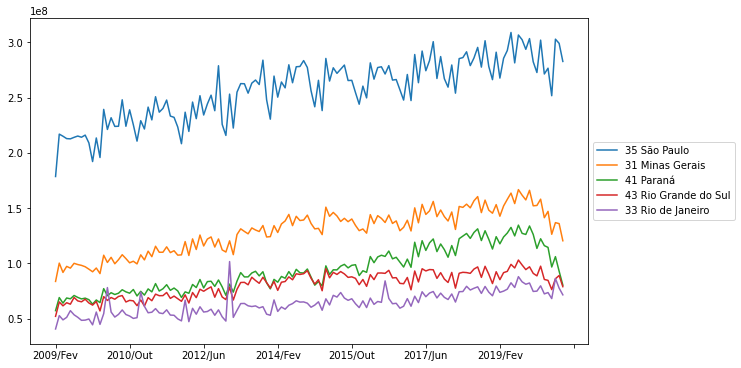

In [130]:
colunas_interessadas = ordenado_total.columns[6:]         # PEGA AS COLUNAS À PARTIR DA 6ª
ordenado_total = ordenado_total[colunas_interessadas]     # SLICE NOS DADOS PARA MANTERA APENAS A PARTIR DA 6ª COLUNA
ordenado_total.T[cinco_maiores].plot(figsize=(10,6))      # PLOTA SOMENTE AS COLUNAS INTERESSADAS.
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))  # JOGA A CAIXA DE LEGENDA PARA FORA DO PLOT

Text(0.5, 1.0, 'Estados com maior valor de gastos hospitalares (fev/08 até ago/20)')

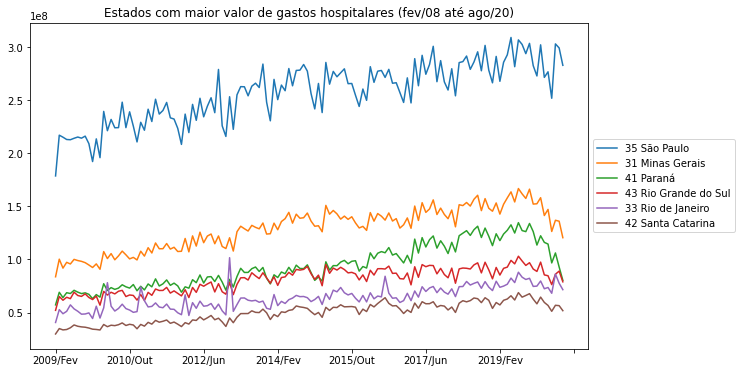

In [138]:
#DESAFIO 
# Adicione seu estado aos 5 existentes.

ordenado_total_SC = ordenado_total.head(5)                                                  # PEGA SOMENTE OS 5 PRIMEIROS DOS USAVEIS ORDENADOS PELO TOTAL
ordenado_total_SC = ordenado_total_SC.append(ordenado_total.loc["42 Santa Catarina"])       # CRIA UM REGISTRO NOVO COM OS DADOS DE SC DOS ORDENADOS
ordenado_total_SC.T.plot(figsize=(10,6))                                                    # PLOTA OS 6 ESTADOS
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                                    # JOGA A CAIXA DE LEGENDA PARA FORA DO PLOT
plt.title("Estados com maior valor de gastos hospitalares (fev/08 até ago/20)")             # ALTERA O TÍTULO DO PLOT

Text(0.5, 1.0, 'Estados com maior valor de gastos hospitalares (fev/08 até ago/20)')

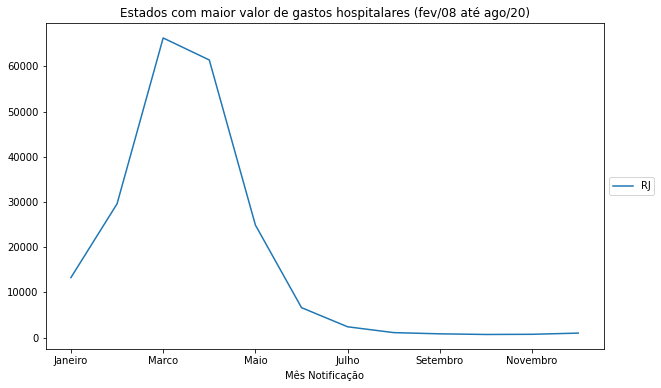

In [170]:
# DESAFIO
# Googlar os casos de dengue no brasil e ver se reflete nos gastos 
# Foi buscado no tabnet os dados de dengue no estado do rio de janeiro, ano de 2013, ordenados por mês
dados_dengue_RJ = dados = pd.read_csv('/content/DENGUE_RJ.csv', engine='python', encoding="ISO-8859-1", skiprows=4, sep=';', skipfooter=16, thousands='.', decimal=',')

dados_dengue_RJ.columns
dados_dengue_RJ = dados_dengue_RJ.set_index("Mês Notificação");
dados_dengue_RJ = dados_dengue_RJ.drop("Total")
dados_dengue_RJ = dados_dengue_RJ.drop("Total", axis=1) 
dados_dengue_RJ.plot(figsize=(10,6))                             # PLOTA OS 6 ESTADOS
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))         # JOGA A CAIXA DE LEGENDA PARA FORA DO PLOT
plt.title("Índice de casos de dengue no Rio de Janeiro (2013)")  # ALTERA O TÍTULO DO PLOT

# Podemos ver um pico nos casos no começo do ano de 2013, que é similar ao que podemos verificar no gráfico dos dados do SUS

Text(0.5, 1.0, 'Gastos hospitalares dos estados (fev/08 até ago/20)')

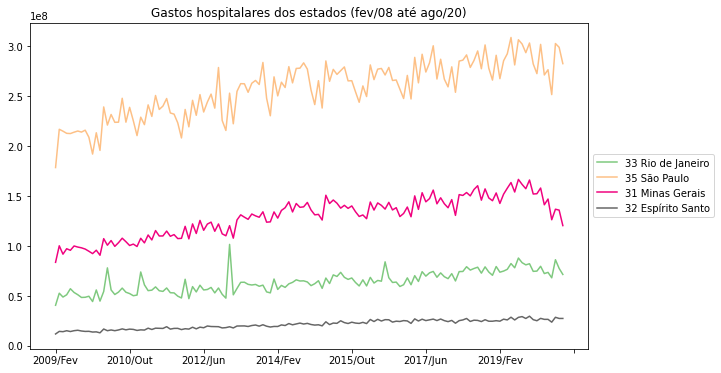

In [166]:
# DESAFIO
# Plotar só os estados do sudeste e ver se afetou com um pico em 2012/2013 de forma similar este estados.
dados_sudeste = ordenado_total.loc[["33 Rio de Janeiro", "35 São Paulo", "31 Minas Gerais", "32 Espírito Santo"]]
dados_sudeste.T.plot(figsize=(10,6), colormap ="Accent")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 
plt.title("Gastos hospitalares dos estados (fev/08 até ago/20)")

Text(0.5, 1.0, 'Gastos hospitalares dos estados do sudeste e SC (fev/08 até ago/20)')

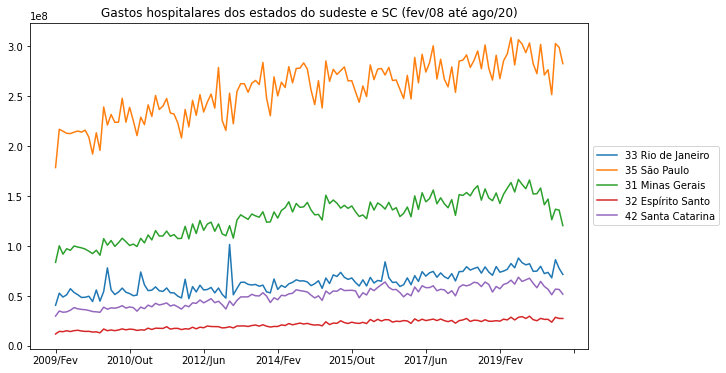

In [142]:
# DESAFIO
# Adicionar o seu estado novamente.
dados_sudeste_com_SC = dados_sudeste.append(ordenado_total.loc["42 Santa Catarina"])       # CRIA UM REGISTRO NOVO COM OS DADOS DE SC DOS ORDENADOS
dados_sudeste_com_SC.T.plot(figsize=(10,6)) 
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 
plt.title("Gastos hospitalares dos estados do sudeste e SC (fev/08 até ago/20)")